# A Paired Sample Analysis of Google Maps Bus Time Estimates in Singapore

## Background
Public transport systems in Singapore play a vital role in transporting millions of people a day. It's efficiency has been, and continues to be a major reason as to why Singapore and it's economy continues to grow at an astounding rate. People often rely on online services to gather information about their public transport. One popular service that is often used is Google Maps. This statistical analysis aims to compare Google Maps' estimated bus travel durations with the actual travel durations recorded during the same journey to determine whether these estimates are accurate and reliable. 

The process began at the bus stop, where estimated bus durations from Google Maps were noted 5 minutes before the bus arrived. As soon as the bus arrived and came to a complete halt, a timer was started. This timer continued until the destination had been reached and the bus came to a complete stop. The time was then noted. This was repeated twenty eight times across an approximate one and a half week duration. 

It is noted that Google Maps estimates are rounded to the nearest minute, however actual travel durations were given to the nearest second. Both sets of data are given in seconds. It is also noted that most of the bus routes are from the 196 bus from UTown to Clementi mall (as I tend to find myself taking this bus route often). Thus there may be some bias, and these results are unlikely to be a completely accurate representation of Singapore as a whole. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Loading Data

In [29]:
estimated_travel_durations = np.array([
    660, 780, 660, 780, 660, 840, 660, 960, 660,
    720, 780, 720, 840, 660, 840, 660, 900, 720,
    660, 840, 660, 780, 720, 900, 720, 960, 720, 780
])

actual_travel_durations = np.array([
    687, 720, 582, 825, 692, 833, 642, 831, 671,
    691, 783, 669, 841, 669, 818, 657, 917, 733,
    672, 849, 703, 788, 692, 861, 685, 937, 732, 813
])

### Boxplot Comparison

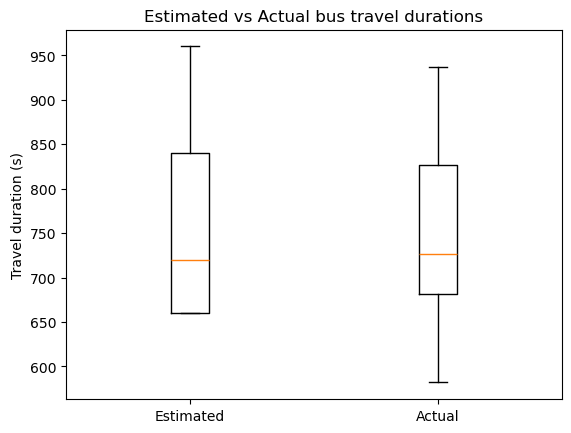

In [30]:
plt.boxplot([estimated_travel_durations, actual_travel_durations], tick_labels=['Estimated', 'Actual'])
plt.title("Estimated vs Actual bus travel durations")
plt.ylabel("Travel duration (s)")
plt.show()

The medians of the estimated travel duration and actual travel durations are approximately equivalent at 720 seconds. However, there appears to be more variation in the actual travel durations as it has an approximate range of 350 seconds as opposed to the estimated travel durations which have an approximate range of 300 seconds. Overall both estimated and actual durations appear to be slightly right skewed. 

### Histogram Visualisation

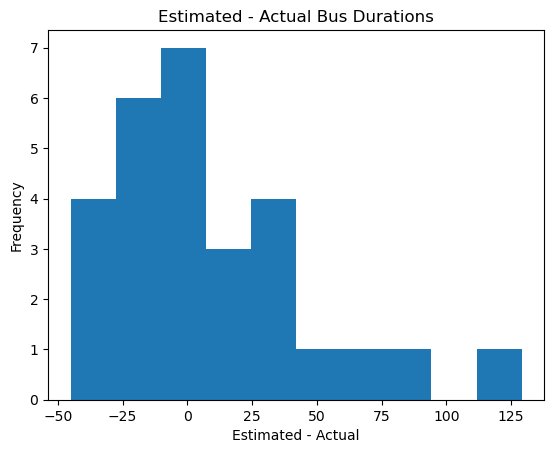

In [31]:
travel_duration_differences = estimated_travel_durations - actual_travel_durations
plt.hist(travel_duration_differences)
plt.xlabel("Estimated - Actual")
plt.ylabel('Frequency')
plt.title('Estimated - Actual Bus Durations')
plt.show()

The histogram of the difference between the two samples appears to be slightly right-skewed. Because of this, normality is not assumed, however the Central Limit Theorem can be weakly invoked (as the sample size is almost equivalent to 30) and thus the distribution of the sample means can be 'weakly assumed' as normal. Note that this is a strong assumption as a sample size close to, equal to or larger than 30 does not necessarily mean that the distribution of sample means is normally distributed, however it can be considered a general rule of thumb.

### Quantile-Quantile Plot

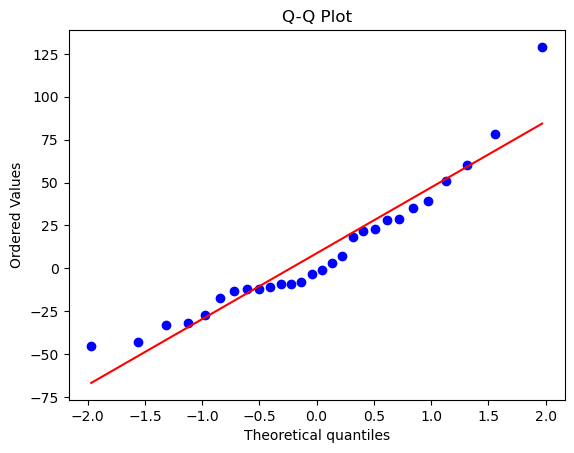

In [36]:
stats.probplot(travel_duration_differences, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

The Quantile-Quantile plot further proves that the data is slightly right-skewed.

### Boxplot of Difference Between Estimated and Actual Travel Durations


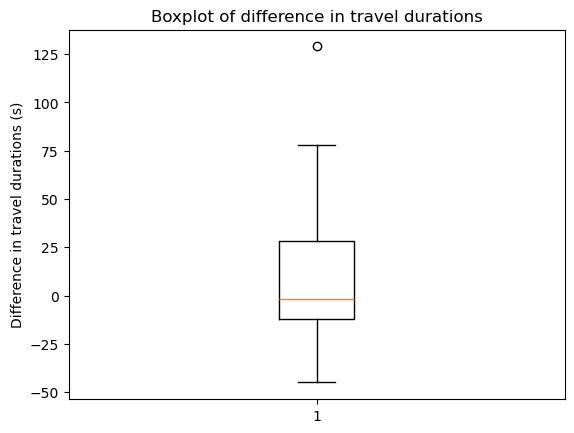

In [39]:
plt.boxplot(travel_duration_differences)
plt.title("Boxplot of difference in travel durations")
plt.ylabel("Difference in travel durations (s)")
plt.show()

This boxplot of the difference between estimated and actual travel durations simply confirms that our data is indeed slightly skewed to the right.

### Paired-sample analysis

In [43]:
res = stats.ttest_rel(estimated_travel_durations, actual_travel_durations)

In [44]:
res.pvalue

0.23761953678841558

The null hypothesis cannot be rejected as there is no significant difference.

### Conclusion

The results of the paired-sample t-test illustrate that under the null hypothesis which states that there is no statistically significant difference between the means of estimated and actual travel durations by bus, there is not enough evidence to reject the null hypothesis as the p-value obtained is equal to 0.2376, which is indeed larger than our significance level of 0.05. 